In [11]:
import sys
sys.path.append('..')

from src.data import conex_file_parser
from src.profile_functions import anormal, gaisser_hillas, usp
from src.util import WrappedTF1

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from ROOT import TGraph

## Load a single profile

In [6]:
input_files = '../data/conex/p_17-20eV_60deg/sibyll23d/*.root'

parser = conex_file_parser(input_files, ['Xdep', 'dEdX'], 1)
x, y = next(parser)
g = TGraph(len(x), x, y)

# Examples using ```curve_fit``` from scipy

In [17]:
def fit_scipy(f, x, y, guess):
  popt, pcov = curve_fit(f, x, y, p0 = guess)
  perr = np.sqrt([pcov[i, i] for i in range(len(guess))])

  plt.fill_between(x, y, color = 'navy', alpha = 0.5, lw = 0)
  plt.plot(x, f(x, *popt), '-', color = 'navy', alpha = 0.7, lw = 2)
  plt.show()

  print('parameters: ', popt)
  print('errors: ', perr)

## 6-parameter Gaisser-Hillas function

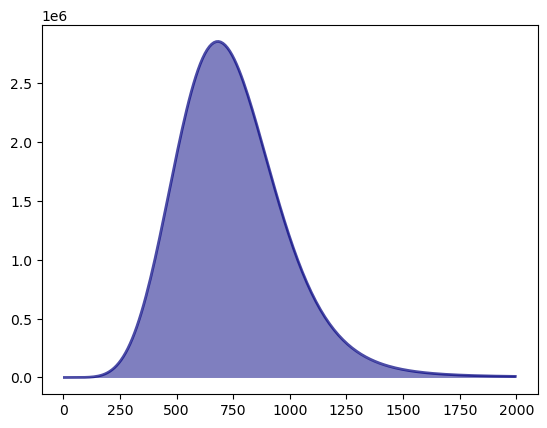

parameters:  [ 2.85435276e+06  6.82149758e+02 -1.54998234e+01  9.25699295e+01
 -6.14466970e-02  3.26541471e-05]
errors:  [9.90414846e+02 1.48736101e-01 6.88531017e+00 1.91045414e+00
 2.51045918e-03 1.05963017e-06]


In [20]:
fit_scipy(gaisser_hillas, x, y, [y.max(), x[y.argmax()], -155, 93, -0.06, 0.00003])

# Examples using root's TF1

In [8]:
def fit_and_draw(f, x, y, *guess):
  fcn = WrappedTF1(f, x[0], x[-1], len(guess))
  fcn.SetParameters(*guess)
  TGraph(len(x), x, y).Fit(fcn, 'sqn0')

  plt.fill_between(x, y, color = 'navy', alpha = 0.5, lw = 0)
  plt.plot(x, fcn(x), '-', color = 'navy', alpha = 0.7, lw = 2)
  plt.show()

  print('parameters: ', fcn.parameters())
  print('errors: ', fcn.errors())

## USP function

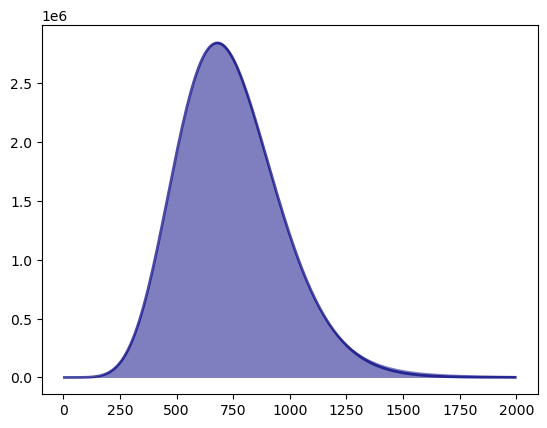

parameters:  [2.83924017e+06 6.79684493e+02 2.18374433e+02 2.73170001e-01]
errors:  [3.25212057e+03 4.50608291e-01 2.90769630e-01 3.24375791e-03]


In [19]:
fit_and_draw(usp, x, y, y.max(), x[y.argmax()], 200, 0.25)

## Gaisser-Hillas function

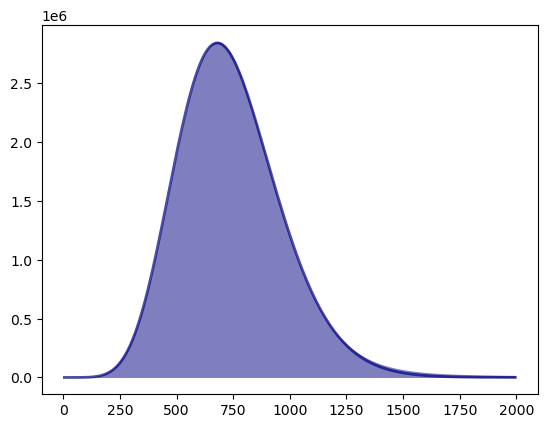

parameters:  [ 2.83924017e+06  6.79684493e+02 -1.19724051e+02  5.96533439e+01]
errors:  [3.25420587e+03 4.50231109e-01 9.18381268e+00 7.13902663e-01]


In [5]:
fit_and_draw(gaisser_hillas, x, y, y.max(), x[y.argmax()], -100, 80)

## Gaisser-Hillas with six parameters

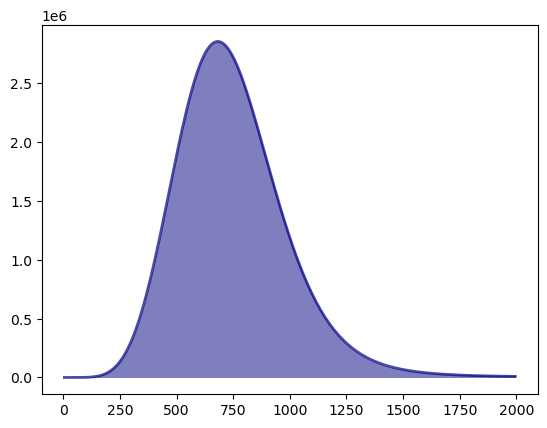

parameters:  [ 2.85435279e+06  6.82149754e+02 -1.55002642e+01  9.25698143e+01
 -6.14465618e-02  3.26540962e-05]
errors:  [9.92128404e+02 1.50666952e-01 7.04835643e+00 1.96438782e+00
 2.59839808e-03 1.10268991e-06]


In [6]:
fit_and_draw(gaisser_hillas, x, y, y.max(), x[y.argmax()], -155, 93, -0.06, 0.00003)

## Asymetric-normal function

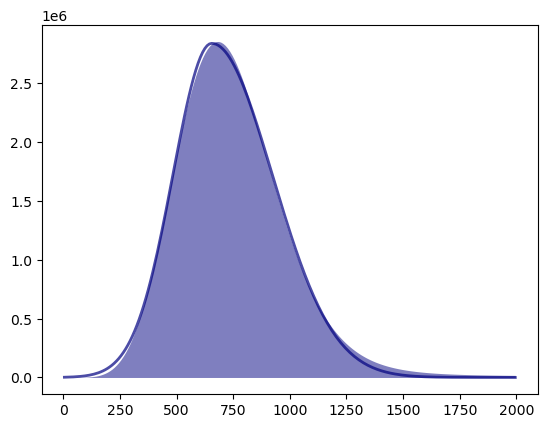

parameters:  [2.83560336e+06 6.54977653e+02 1.71160074e+02 2.67832091e+02]
errors:  [6.68627351e+03 1.49443944e+00 1.27990622e+00 1.46665391e+00]


In [7]:
fit_and_draw(anormal, x, y, y.max(), x[y.argmax()], 80, 100)